In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import (OneHotEncoder,
                                    LabelEncoder,
                                    OrdinalEncoder,
                                    StandardScaler, 
                                    MinMaxScaler,
                                    RobustScaler,
                                    FunctionTransformer)

from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor
from sklearn.linear_model import(LinearRegression, 
                                 Lasso, 
                                 Ridge,
                                 ElasticNet)
from sklearn.ensemble import(RandomForestRegressor, 
                            GradientBoostingRegressor, 
                            AdaBoostRegressor)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import(r2_score,
                            root_mean_squared_error,
                            mean_absolute_error)
from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.compose import ColumnTransformer

warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('/Users/suryasaikadali/Downloads/pw_skills/kaggle/insurance_prediction/artifacts/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
x = df.drop(['expenses'], axis = 1)

In [5]:
y = df[['expenses']]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x, y,
                                                 test_size = 0.20, random_state = 42)

In [7]:
cat_col = [col for col in x.columns if x[col].dtype == 'O' ]
float_col = [col for col in x.columns if x[col].dtype == 'float']
age_col = ['age']
child_col = ['children']

In [8]:
cat_col

['sex', 'smoker', 'region']

In [9]:
"""total_cols = (cat_col
              + float_col
              + age_col
              + child_col)"""

'total_cols = (cat_col\n              + float_col\n              + age_col\n              + child_col)'

In [10]:
cat_pipeline = Pipeline(
    steps = [
        ('one_hot',OneHotEncoder(drop = 'first')),
    ]
)

float_pipeline = Pipeline(
    steps = [
        ('robust',RobustScaler())
    ]
)

age_pipeline = Pipeline(
    steps = [
        ('standard_scaler',StandardScaler())
    ]
)

child_pipeline = Pipeline(
    steps = [
        ('standard_scaler',StandardScaler())
    ]
)

In [11]:
preprocessor = ColumnTransformer([
    ('cat_pipeline', cat_pipeline, cat_col),
    ('float_pipeline', float_pipeline, float_col),
    ('age_pipeline', age_pipeline, age_col),
    ('child_pipeline', child_pipeline, child_col),
]    
)

In [12]:
x_train_new = pd.DataFrame(preprocessor.fit_transform(x_train),
                           columns = preprocessor.get_feature_names_out())
x_test_new = pd.DataFrame(preprocessor.transform(x_test),
                          columns = preprocessor.get_feature_names_out())

In [13]:
x_train_new

,cat_pipeline__sex_male,cat_pipeline__smoker_yes,cat_pipeline__region_northwest,cat_pipeline__region_southeast,cat_pipeline__region_southwest,float_pipeline__bmi,age_pipeline__age,child_pipeline__children
0,0.0,0.0,1.0,0.0,0.0,-1.228916,0.472227,0.734336
1,0.0,0.0,0.0,0.0,0.0,-0.710843,0.543313,-0.911192
2,0.0,0.0,0.0,1.0,0.0,-0.638554,0.898745,-0.911192
3,0.0,0.0,0.0,1.0,0.0,0.493976,-0.025379,3.202629
4,0.0,0.0,1.0,0.0,0.0,-1.048193,1.040918,1.557100
...,...,...,...,...,...,...,...,...
1065,0.0,0.0,0.0,0.0,0.0,0.144578,-1.518194,2.379865
1066,0.0,0.0,0.0,1.0,0.0,-0.759036,-0.025379,3.202629
1067,1.0,0.0,0.0,0.0,0.0,-0.602410,1.325264,-0.911192
1068,0.0,1.0,0.0,0.0,1.0,2.096386,-0.167551,0.734336


In [14]:
sample = ['float_pipeline__bmi','age_pipeline__age','child_pipeline__children']
sample_col = ['bmi','age','children']

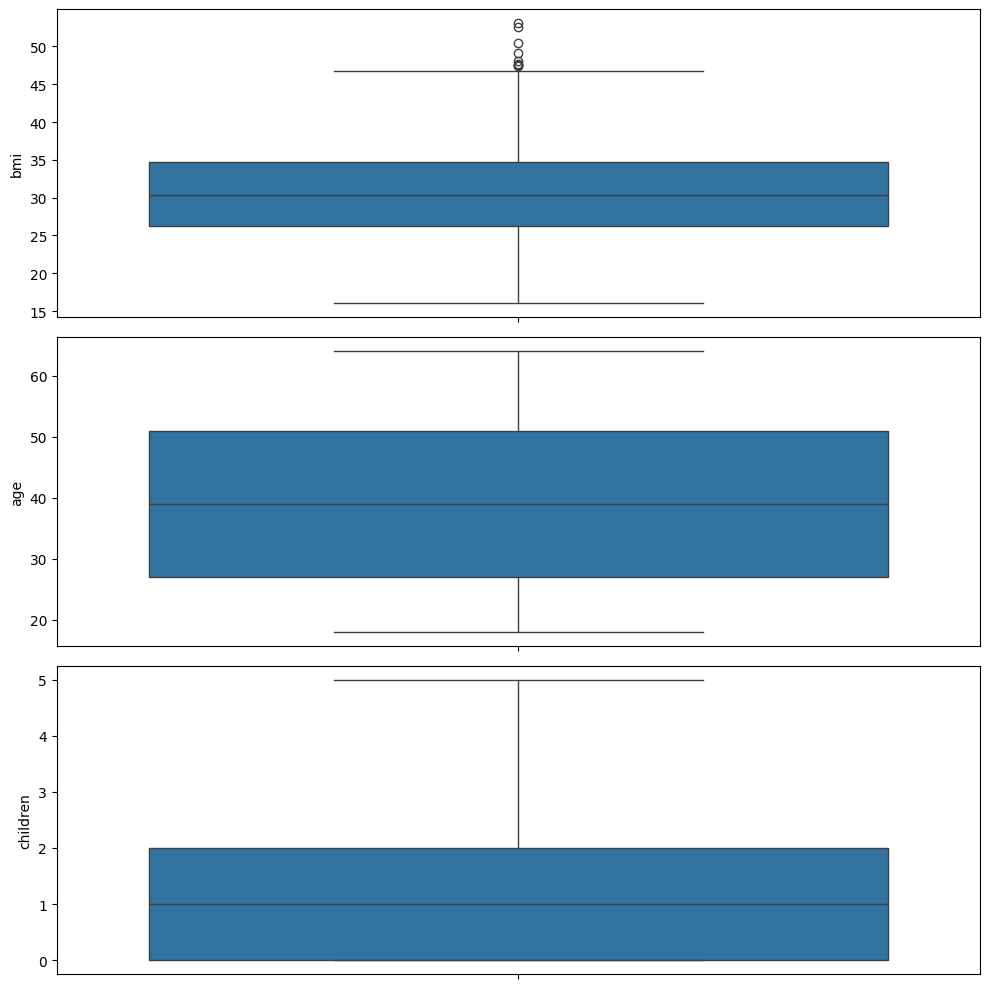

In [15]:
plt.figure(figsize = (10,10))
for i,col in enumerate(sample_col):
    plt.subplot(3,1,i+1)
    sns.boxplot(df, y = col)
    plt.tight_layout()

In [50]:
tyu = df[['bmi']]

In [51]:
tyu = np.sqrt(tyu)

In [52]:
tyu

,bmi
0,5.282045
1,5.813777
2,5.744563
3,4.764452
4,5.375872
...,...
1333,5.567764
1334,5.648008
1335,6.074537
1336,5.079370


<Axes: ylabel='bmi'>

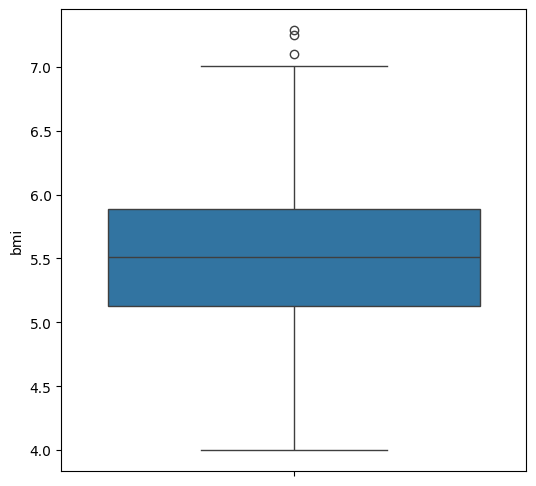

In [53]:
plt.figure(figsize = (6,6))
sns.boxplot(tyu, y = 'bmi')

In [54]:
sc = StandardScaler()

In [55]:
ert = pd.DataFrame(sc.fit_transform(tyu), columns = ['bmi'])

<Axes: ylabel='bmi'>

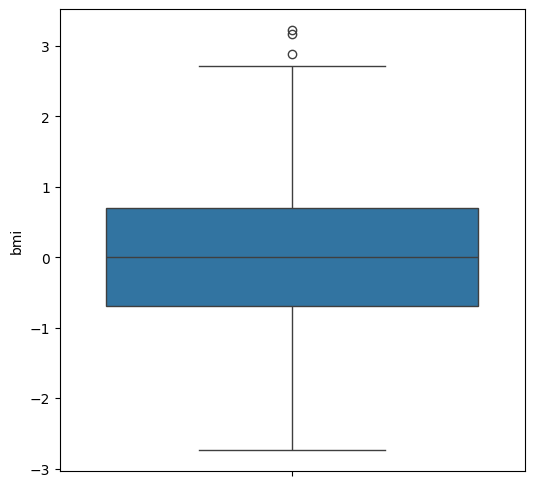

In [56]:
plt.figure(figsize = (6,6))
sns.boxplot(ert, y = 'bmi')

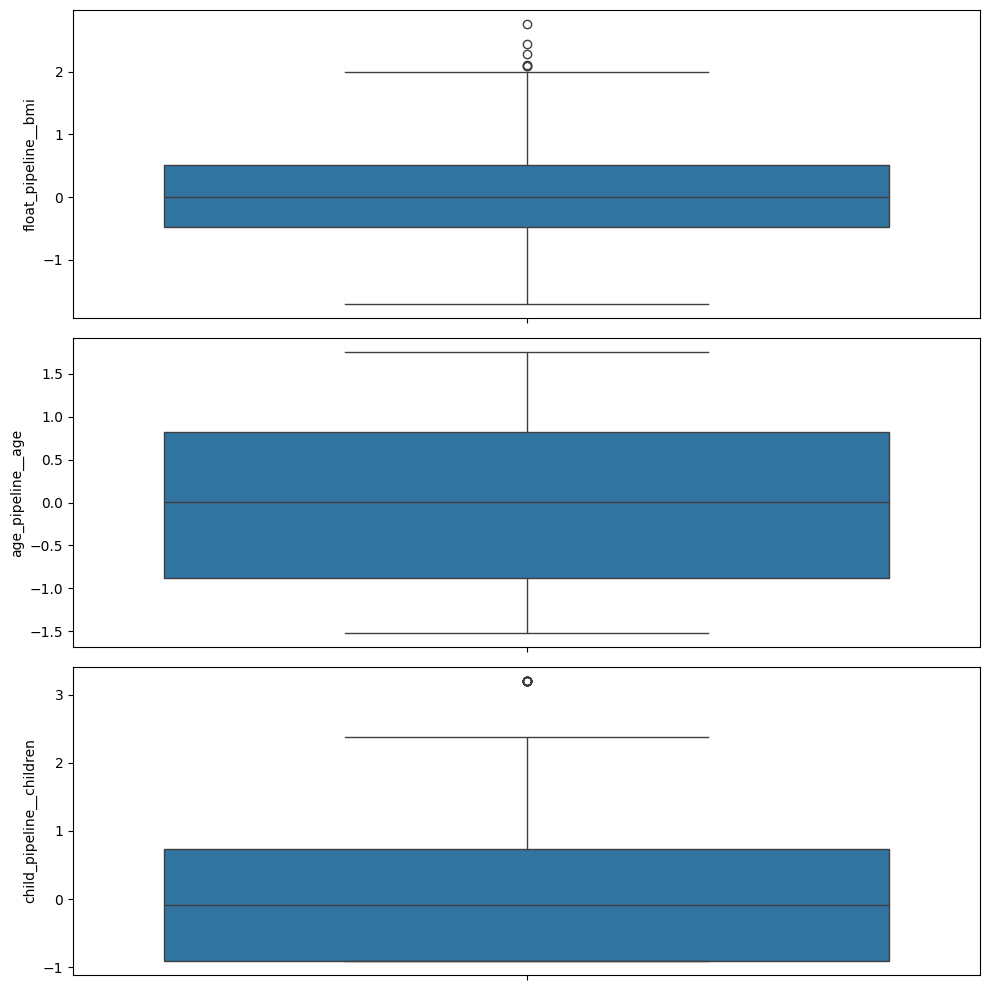

In [16]:
plt.figure(figsize = (10,10))
for i,col in enumerate(sample):
    plt.subplot(3,1,i+1)
    sns.boxplot(x_train_new, y = col)
    plt.tight_layout()

In [17]:
x_train_new.columns[1]

'cat_pipeline__smoker_yes'

In [18]:
scores = mutual_info_regression(x_train_new,y_train)

In [19]:
scores

array([0.15492931, 0.3583033 , 0.01697065, 0.03173397, 0.01905221,
       0.09459927, 1.39712502, 0.13808042])

In [20]:
ab = {}
for i,score in enumerate(scores):
    ab.update({x_train_new.columns[i]:score})

In [21]:
ab

{'cat_pipeline__sex_male': 0.15492930633529944,
 'cat_pipeline__smoker_yes': 0.35830330284025025,
 'cat_pipeline__region_northwest': 0.016970649704029395,
 'cat_pipeline__region_southeast': 0.03173396698405995,
 'cat_pipeline__region_southwest': 0.019052205433099267,
 'float_pipeline__bmi': 0.0945992692446529,
 'age_pipeline__age': 1.3971250211666923,
 'child_pipeline__children': 0.13808042194204084}

In [22]:
sorted_ab = sorted(ab.items(), key = lambda item:item[1],reverse = True)

In [23]:
sorted_ab

[('age_pipeline__age', 1.3971250211666923),
 ('cat_pipeline__smoker_yes', 0.35830330284025025),
 ('cat_pipeline__sex_male', 0.15492930633529944),
 ('child_pipeline__children', 0.13808042194204084),
 ('float_pipeline__bmi', 0.0945992692446529),
 ('cat_pipeline__region_southeast', 0.03173396698405995),
 ('cat_pipeline__region_southwest', 0.019052205433099267),
 ('cat_pipeline__region_northwest', 0.016970649704029395)]

<Axes: >

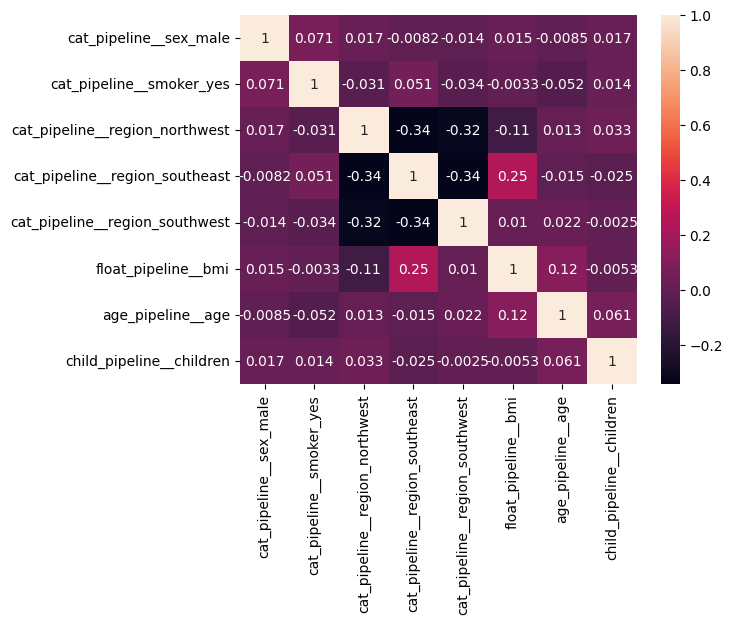

In [24]:
sns.heatmap(x_train_new.corr(), annot = True)

<Axes: xlabel='sex', ylabel='expenses'>

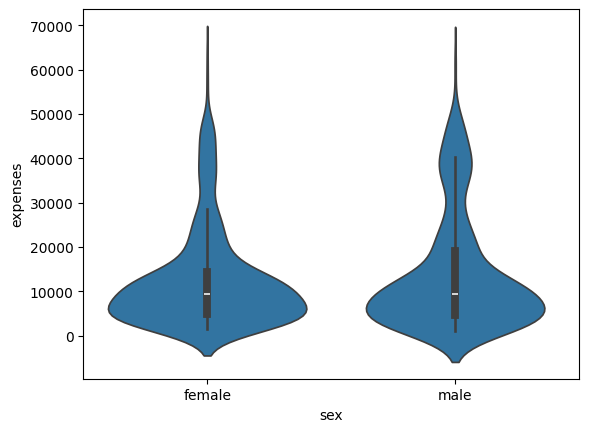

In [25]:
sns.violinplot(df, 
               x = 'sex',
               y = 'expenses')

In [26]:
models = {
    'linear':LinearRegression(),
    'Lasso':Lasso(),
    'ridge':Ridge(),
    'random':RandomForestRegressor(),
    'xg':XGBRegressor(),
    'Gradient':GradientBoostingRegressor(),
    'ada': AdaBoostRegressor()
}

In [27]:
for key,value in models.items():
    model = value.fit(x_train_new,y_train)
    y_predict = model.predict(x_test_new)
    r2 = r2_score(y_true = y_test,
                  y_pred = y_predict)
    rmse = root_mean_squared_error(y_true = y_test,
                                   y_pred = y_predict)
    mae = mean_absolute_error(y_true = y_test,
                              y_pred = y_predict)
    print(key)
    print(r2)
    print(rmse)
    print(mae)
    print("%%%%%%%%%%%")

linear
0.783572693003991
5796.55633588407
4181.5615240007655
%%%%%%%%%%%
Lasso
0.7835158066142596
5797.318077788199
4182.478354947796
%%%%%%%%%%%
ridge
0.7832599511939168
5800.742894239949
4193.060090641012
%%%%%%%%%%%
random
0.8624656923984282
4620.82536990584
2574.8608222014923
%%%%%%%%%%%
xg
0.8133271932601929
5383.374327500632
3201.602830446158
%%%%%%%%%%%
Gradient
0.8792883370011181
4329.010605976644
2470.835233066608
%%%%%%%%%%%
ada
0.8058274918473036
5490.449527616487
4777.920304849672
%%%%%%%%%%%
